#### Описание датасета
Посмотрим на переменные, которые содержит датасет:

- 1 school — аббревиатура школы, в которой учится ученик
- 2 sex — пол ученика ('F' - женский, 'M' - мужской)
- 3 age — возраст ученика (от 15 до 22)
- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
- 16 schoolsup — дополнительная образовательная поддержка (yes или no)
- 17 famsup — семейная образовательная поддержка (yes или no)
- 18 paid — дополнительные платные занятия по математике (yes или no)
- 19 activities — дополнительные внеучебные занятия (yes или no)
- 20 nursery — посещал детский сад (yes или no)
- 21 higher — хочет получить высшее образование (yes или no)
- 22 internet — наличие интернета дома (yes или no)
- 23 romantic — в романтических отношениях (yes или no)
- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- 28 absences — количество пропущенных занятий
- 29 score — баллы по госэкзамену по математике

# Загружаем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
import my_lib_rds2 as ml2 # моя библиотека для данного проекта

In [3]:
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

# Загружаем датасет. Общий обзор

In [4]:
df = pd.read_csv('stud_math.csv')

## Оценка количества пропусков

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

В датасете **30 столбцов** (в описании 29!) и **395 строк**. Почти все столбцы содержат незначительноее количество пропусков (**пропусков не более 11%**). Только 3 столбца не содержат пропусков.

In [6]:
len(df.dropna(axis = 0, how = 'any'))

97

#### Только 97 строк не содержат пропусков. Это менее 25%.

## Работа с именами столбцов

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

**Переименуем столбцы** (избавимся от заглавных букв и сложных названий)

In [8]:
df.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

## Лишний столбец?('studytime, granular')

В датасете есть 1 столбец, который отсутствует в описании - **"studytime, granular"**, и его название очень схоже со столбцом **"studytime"**. Давайте проанализируем их.

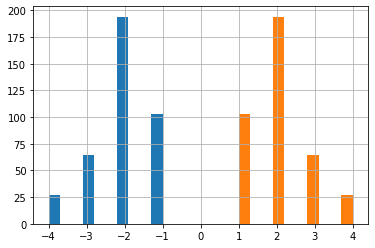

In [9]:
(df['studytime_gr']*(1/3)).hist()
df['studytime'].hist()
plt.show()

In [10]:
(df['studytime_gr']*(-1/3)).value_counts(dropna = False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime_gr, dtype: int64

In [11]:
df['studytime'].value_counts(dropna = False)

2.0    194
1.0    103
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

In [12]:
df[['studytime_gr', 'studytime']].corr()

,studytime_gr,studytime
studytime_gr,1.0,-1.0
studytime,-1.0,1.0


Данные столбцы явно линейно зависимы, **удалим столбец 'studytime, granular'** ('studytime_gr'), т.к. он отсутствует в описании, а при необходимости легко восстановим.

In [13]:
df.drop(['studytime_gr'], axis = 'columns', inplace = True)

## Промежуточное резюме

- удалили столбец 'studytime, granular', т.к. эти данные дублируют данные 'studytime' (с коэф. -1/3)
- общее количесвто пропусков невелико (менее 10%), но их распределение по данным не позволяет избавиться от пропусков простым удалением строк или столбцов

##### В датасете осталось
- 395 строк, 97 из которых не содержат пропусков
- 29 параметров (столбцов), 3 из которых не содержат пропусков (age, school, sex)

##### Параметры можно разделить на группы
- **количественные (3 шт.)**: age, absences, score
- **номинативные (26 шт.)**, в т.ч.
    - **бинарные (13 шт.)**: sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school
    - **ранговые (13 шт.)**: m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

# Рассмотрим количественные параметры

## Общий обзор

In [14]:
df[['age', 'absences', 'score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 3 columns):
age         395 non-null int64
absences    383 non-null float64
score       389 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.4 KB


В первую очередь мы видим **пропуски в данных по целевой переменной - 'score'**.
**Мы не имеем возможности восстановить эти данные**, а заполненние пропусков на основании разных гипотез скорее навредит нашей моделе, поэтому **следует удалить строки данных с пропусками в столбце 'score'.**

In [15]:
df.dropna(subset = ['score'], how = 'any', inplace = True)

## age - возраст

In [16]:
print(df.age.value_counts(dropna = False))

16    103
17     98
15     82
18     80
19     21
20      3
22      1
21      1
Name: age, dtype: int64


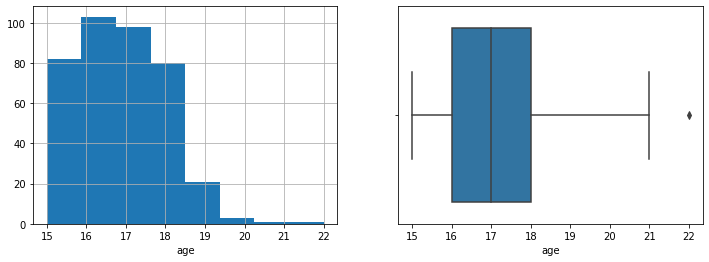

In [17]:
ml2.hist_and_box(df.age)

- пропусков нет
- распределение имеет один выброс (согласно межквартильному интервалу), но значение 22 года входит в возрастной диапазон (16-22), указанный в описании к данным и к тому же это значение не сильно выше верхней границы межквартильного диапозона (21).
- оставляем данные как есть

## score - баллы по госэкзамену по математике

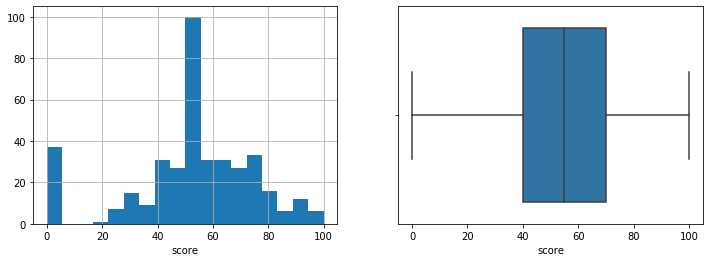

In [18]:
ml2.hist_and_box(df.score)

Диапазон значений в ожидаемых пределах (от 0 до 100). Пропуски мы удалили ранее. Выбросов нет.

Имеем два значительных пика в 0 и в диапозоне 50-55 баллов.

Ученики, которые получили 0 баллов за экзамен явно выделяются на фоне остальных учеников. Те кто получил 0 баллов, скорее всего не сдавали экзамен по каким-то причинам.

## absences - пропуски занятий

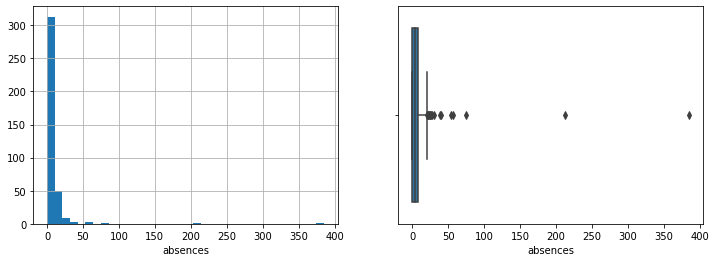

In [19]:
ml2.hist_and_box(df.absences)

Данные имеют явно много выбросов, согласно межквартильному интервалу. Посмотрим на эти гранцы и постараемся найти компромисс.

In [20]:
ml2.outliers(df.absences)

Нижняя граница:  -12.0  и таких значений  0
Верхняя граница:  20.0  и таких значений  17


In [21]:
ind = list(df.absences.value_counts(dropna = True).index)
ind.sort()
print(ind)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 30.0, 38.0, 40.0, 54.0, 56.0, 75.0, 212.0, 385.0]


Данные имееют очень большой размах, что может негативно отразиться на нашей моделе. Попробуем избавиться от "хвостов". А точнее от "хвоста" справа

Межквартильная проверка отбрасывает очень много значений. Думаю стоит отбросить значения которые идут с большими гэпами относительно соседей. Например значения выше 30.

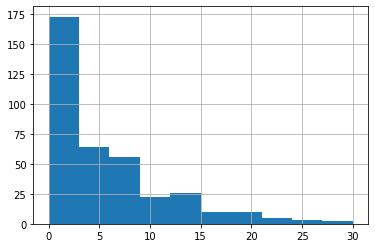

In [22]:
df.absences[(df.absences <= 30)].hist() # Грфик без хвоста > 30

Заменим значения выше 30 на значения 30.

In [23]:
more_then_30 = df[df.absences > 30].index
df.loc[more_then_30, 'absences'] = 30

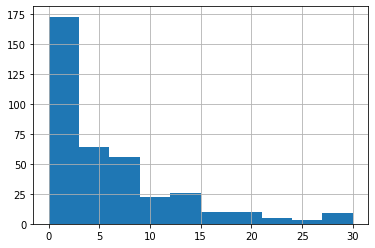

In [24]:
df.absences.hist()

Небольшой образовавшийся пик в значении 30 смотриться в пределах статистической погрешности.

##### Рассмотрим пропуски в данных.

In [25]:
len(df[df.absences.isnull()])

11

Заменим пропуски на модовские значения с аналогичным баллом.

In [26]:
ml2.mode_change(df, 'absences', 'score')

24 nan  ->  0.0
101 nan  ->  0.0
120 nan  ->  0.0
129 nan  ->  0.0
150 nan  ->  0.0
172 nan  ->  4.0
215 nan  ->  0.0
227 nan  ->  0.0
254 nan  ->  0.0
265 nan  ->  0.0
352 nan  ->  0.0


## Корреляционный анализ

In [27]:
df[['score', 'age', 'absences']].corr()

,score,age,absences
score,1.000000,-0.155726,0.049953
age,-0.155726,1.000000,0.191898
absences,0.049953,0.191898,1.000000


**Явно скорреллированных параметров нет.** К дальнейшему рассмотрению допущены все параметры.

# Рассмотрим номинативные параметры

- бинарные (13 шт.): sex, address, famsize, p_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, school
- ранговые (13 шт.): m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

и начнём с бинарных параметров

## Бинарные параметры

### Параметры yes/no 
(schoolsup, famsup, paid, activities, nursery, higher, 	internet, romantic)

Проверим эти данные на корректность значений. Пропуски разумнее всего заменить на 'no' (по принципу скрытого нуля)

In [28]:
bin_list = ['schoolsup','famsup','paid','activities','nursery',
            'higher','internet','romantic']

In [29]:
df[bin_list].describe()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,380,351,350,375,374,369,355,358
unique,2,2,2,2,2,2,2,2
top,no,yes,no,yes,yes,yes,yes,no
freq,331,216,197,192,297,350,300,235


Данные корректны, т.к. везде по два уникальных значения. Посмотрим на количество пропусков.

In [30]:
ml2.miss_count(df, bin_list)

,col,miss,percent,nunique
0,schoolsup,9,2.3,2
1,famsup,38,9.8,2
2,paid,39,10.0,2
3,activities,14,3.6,2
4,nursery,15,3.9,2
5,higher,20,5.1,2
6,internet,34,8.7,2
7,romantic,31,8.0,2


Пропуски составляют не более 10%. Заполним их значением 'no'. Затем поменяем значения на бинарные (0 и 1)

In [31]:
for col in bin_list:
    df[col].fillna('no', inplace=True)
    df[col].replace('yes', 1, inplace=True)
    df[col].replace('no', 0, inplace=True)

### Прочие бинарные параметры (sex, address, famsize, p_status)

In [32]:
bin_list2 = ['sex', 'address', 'famsize', 'p_status']

In [35]:
ml2.miss_count(df, bin_list2)

,col,miss,percent,nunique
0,sex,0,0.0,2
1,address,15,3.9,2
2,famsize,27,6.9,2
3,p_status,45,11.6,2


### sex - пол ученика ('F' - женский, 'M' - мужской)

In [36]:
df.sex.value_counts(dropna = False)

F    204
M    185
Name: sex, dtype: int64

Все значения корректны, пропусков нет. Мальчиков и девочек учиться примерно одинаковое количество с небольшим перевесом по количеству девочек.

### address - тип адреса ученика 
('U' - городской, 'R' - за городом)

In [37]:
df.address.value_counts(dropna = False)

U      291
R       83
NaN     15
Name: address, dtype: int64

Все значения корректны. Имеем 15 пропусков. Подавляющая часть учеников живёт в городе.

Есть предположение, что адрес ученика находится в зависимости traveltime. Проверим это предположение.

In [38]:
df.groupby(['traveltime'])['address'].value_counts()

traveltime  address
1.0         U          198
            R           34
2.0         U           63
            R           26
3.0         R           12
            U            9
4.0         R            4
            U            3
Name: address, dtype: int64

Как видим ученики, которые живут в городе быстрее добираются до школы. Заполним пропуски исходя из этой гипотезы (в соответствии с частотой распределения параметра в зависимости от времени в пути).

In [39]:
ml2.mode_change(df, 'address', 'traveltime')

6 nan  ->  U
52 nan  ->  U
75 nan  ->  U
92 nan  ->  U
96 nan  ->  U
159 nan  ->  U
168 nan  ->  U
254 nan  ->  U
292 nan  ->  U
354 nan  ->  U
359 nan  ->  U
376 nan  ->  U
241 nan  ->  U
348 nan  ->  U
372 nan  ->  U


### famsize - размер семьи
('LE3' <= 3, 'GT3' >3)

In [40]:
df.famsize.value_counts(dropna = False)

GT3    255
LE3    107
NaN     27
Name: famsize, dtype: int64

Заполним пропуски по частотному распределению (рандомно, в той же пропорции что и заполненная часть)

In [41]:
df['famsize'].fillna(ml2.fill_by_prop(df, 'famsize'), inplace=True)

### p_status - статус совместного жилья родителей
('T' - живут вместе 'A' - раздельно)

In [42]:
df.p_status.value_counts(dropna = False)

T      308
NaN     45
A       36
Name: p_status, dtype: int64

Заполним пропуски по частотному распределению (рандомно, в той же пропорции что и заполненная часть)

In [48]:
df['p_status'].fillna(ml2.fill_by_prop(df,'p_status'), inplace=True)

## Рассмотрим оставшиеся номинативные параметры
А именно ранговые (13 шт.): m_edu, f_edu, m_job, f_job, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health

### traveltime - время в пути до школы 
(1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [49]:
df.traveltime.value_counts(dropna = False)

1.0    239
2.0     94
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

Ранее мы заполняли пропуски в 'address' по самым частотным значениям во 'traveltime'. Аналогично выполним обратное заполнение пропусков в 'traveltime'.

In [50]:
ml2.mode_change(df, 'traveltime', 'address')

26 nan  ->  1.0
30 nan  ->  1.0
35 nan  ->  1.0
37 nan  ->  1.0
59 nan  ->  1.0
68 nan  ->  1.0
70 nan  ->  1.0
104 nan  ->  1.0
112 nan  ->  1.0
132 nan  ->  1.0
134 nan  ->  1.0
137 nan  ->  1.0
142 nan  ->  1.0
147 nan  ->  1.0
157 nan  ->  1.0
160 nan  ->  1.0
182 nan  ->  1.0
226 nan  ->  1.0
234 nan  ->  1.0
241 nan  ->  1.0
261 nan  ->  1.0
268 nan  ->  1.0
310 nan  ->  1.0
348 nan  ->  1.0
372 nan  ->  1.0
384 nan  ->  1.0
385 nan  ->  1.0
389 nan  ->  1.0


### failures - количество внеучебных неудач

Согласно описанию диапазон значений: (n, если 1<=n<3, иначе 4)

In [51]:
df.failures.value_counts(dropna = False)

0.0    290
1.0     48
NaN     22
2.0     15
3.0     14
Name: failures, dtype: int64

Среди значений параметра нет 4, хотя это предусмотрено описанием, и много 0, что описанием не предусмотрено. Думаю тут самое очевидное объясние - сдвижка в значениях описания относительно самих данных. Думаю стоит откорректировать описание на следующее: **"n, если n <= 2, иначе 3"**

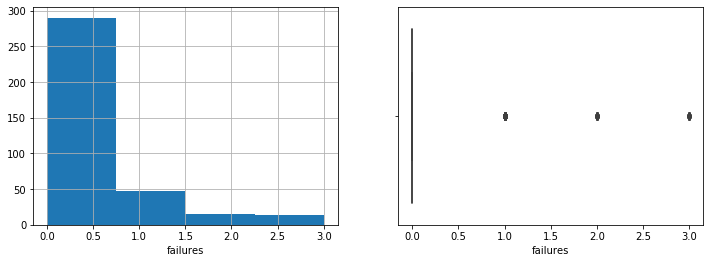

In [52]:
ml2.hist_and_box(df.failures)

"0" - самое частое значение и вероятнее всего пропуски в данном случае - "скрытый 0". ЗАполним пропуски согласно данной гипотизе.

In [53]:
df['failures'].fillna(0, inplace=True)

### m_edu - образование матери
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [54]:
df.m_edu.value_counts(dropna = False)

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
NaN      3
Name: m_edu, dtype: int64

Имеем всего лишь 3 пропуска. Можно заполнить по модовским значениям типа работы.

In [55]:
ml2.mode_change(df, 'm_edu', 'm_job')

92 nan  ->  2.0
193 nan  ->  3.0
239 nan  ->  2.0


### f_edu - образование отцов
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [56]:
df.f_edu.value_counts(dropna = False)

2.0     105
3.0      94
4.0      88
1.0      75
NaN      24
0.0       2
40.0      1
Name: f_edu, dtype: int64

Есть значение, которое явно некорректно. Значение - 40. Предполагаю, что это ошибка и значение должно быть равно 4.

In [57]:
df['f_edu'].replace(40, 4, inplace=True)

Есть предположение, что образование родителей кореллируют друг с другом, проверим это предположение

In [58]:
df.groupby(['m_edu'])['f_edu'].value_counts()

m_edu  f_edu
0.0    2.0       2
       1.0       1
1.0    1.0      34
       2.0      12
       3.0       5
       0.0       1
       4.0       1
2.0    2.0      48
       1.0      27
       3.0      16
       4.0       7
3.0    3.0      34
       2.0      25
       4.0      18
       1.0      13
4.0    4.0      63
       3.0      39
       2.0      18
       0.0       1
Name: f_edu, dtype: int64

Так и есть. Заменим пропуски в f_edu на соотвествующие значения моды для m_edu

In [59]:
ml2.mode_change(df, 'f_edu', 'm_edu')

21 nan  ->  4.0
42 nan  ->  4.0
46 nan  ->  3.0
57 nan  ->  4.0
58 nan  ->  1.0
67 nan  ->  3.0
137 nan  ->  3.0
142 nan  ->  4.0
159 nan  ->  3.0
161 nan  ->  3.0
180 nan  ->  4.0
195 nan  ->  2.0
232 nan  ->  4.0
236 nan  ->  2.0
259 nan  ->  2.0
280 nan  ->  4.0
281 nan  ->  3.0
286 nan  ->  2.0
287 nan  ->  1.0
290 nan  ->  4.0
310 nan  ->  1.0
328 nan  ->  4.0
349 nan  ->  3.0
374 nan  ->  4.0


### m_job - работа матери
### f_job - работа отца
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [60]:
df.m_job.value_counts(dropna = False)

other       127
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: m_job, dtype: int64

In [61]:
df.f_job.value_counts(dropna = False)

other       194
services     99
NaN          36
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

In [62]:
df.groupby(['m_edu'])['m_job'].value_counts()

m_edu  m_job   
0.0    at_home      2
       other        1
1.0    at_home     25
       other       23
       services     5
       health       1
2.0    other       45
       services    30
       at_home     21
       health       2
3.0    services    39
       other       36
       at_home      8
       health       5
       teacher      3
4.0    teacher     52
       health      24
       services    24
       other       22
       at_home      2
Name: m_job, dtype: int64

In [63]:
df.groupby(['f_edu'])['f_job'].value_counts()

f_edu  f_job   
0.0    other        2
1.0    other       46
       services    19
       at_home      4
       health       1
       teacher      1
2.0    other       59
       services    28
       at_home      7
       health       1
3.0    other       53
       services    33
       at_home      3
       health       3
       teacher      1
4.0    other       34
       teacher     27
       services    19
       health      10
       at_home      2
Name: f_job, dtype: int64

Предполагаю, что есть некотаря связь образования и места работы. Заполним пропуски в работе исходя из образования.

In [64]:
ml2.mode_change(df, 'm_job', 'm_edu')

29 nan  ->  teacher
54 nan  ->  services
59 nan  ->  teacher
88 nan  ->  other
104 nan  ->  services
128 nan  ->  other
145 nan  ->  at_home
156 nan  ->  at_home
166 nan  ->  other
174 nan  ->  services
177 nan  ->  services
219 nan  ->  other
224 nan  ->  teacher
260 nan  ->  teacher
265 nan  ->  services
268 nan  ->  teacher
277 nan  ->  teacher
291 nan  ->  teacher
337 nan  ->  services


In [65]:
ml2.mode_change(df, 'f_job', 'f_edu')

3 nan  ->  other
17 nan  ->  other
22 nan  ->  other
26 nan  ->  other
31 nan  ->  other
44 nan  ->  other
47 nan  ->  other
52 nan  ->  other
59 nan  ->  other
68 nan  ->  other
107 nan  ->  other
118 nan  ->  other
120 nan  ->  other
135 nan  ->  other
151 nan  ->  other
152 nan  ->  other
160 nan  ->  other
161 nan  ->  other
169 nan  ->  other
182 nan  ->  other
216 nan  ->  other
229 nan  ->  other
250 nan  ->  other
266 nan  ->  other
294 nan  ->  other
303 nan  ->  other
309 nan  ->  other
316 nan  ->  other
336 nan  ->  other
341 nan  ->  other
345 nan  ->  other
363 nan  ->  other
365 nan  ->  other
373 nan  ->  other
374 nan  ->  other
384 nan  ->  other


### 'studytime' - время на учёбу помимо школы в неделю 
(1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [66]:
df.studytime.value_counts(dropna = False)

2.0    189
1.0    103
3.0     63
4.0     27
NaN      7
Name: studytime, dtype: int64

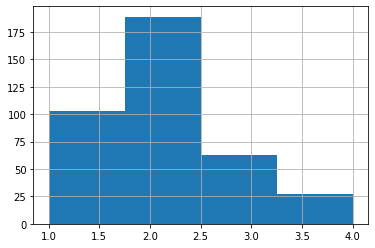

In [67]:
df.studytime.hist(bins = 4)
plt.show()

Довольно плавное распределение и всего лишь 7 пропусков. Заполним пропуски модой (она же медиана в данном случае)

In [68]:
ml2.mode_change(df, 'studytime', 'studytime')

17 nan  ->  2.0
91 nan  ->  2.0
112 nan  ->  2.0
129 nan  ->  2.0
227 nan  ->  2.0
266 nan  ->  2.0
314 nan  ->  2.0


### famrel -  семейные отношения 
(от 1 - очень плохо до 5 - очень хорошо)

In [69]:
df.famrel.value_counts(dropna = False)

 4.0    178
 5.0     97
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Значение "-1" - явная опечатка, заменим его на "1"

In [70]:
df['famrel'].replace(-1, 1, inplace=True)

Пропуски замолним медианой

In [71]:
median = df['famrel'].median()
df['famrel'] = df['famrel'].fillna(median)

### freetime - свободное время после школы 
(от 1 - очень мало до 5 - очень мого)

In [72]:
df.freetime.value_counts(dropna = False)

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
NaN      9
Name: freetime, dtype: int64

Пропуски замолним медианой

In [73]:
median = df['freetime'].median()
df['freetime'] = df['freetime'].fillna(median)

### goout - проведение времени с друзьями
(от 1 - очень мало до 5 - очень много)

In [74]:
df.goout.value_counts(dropna = False)

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
NaN      7
Name: goout, dtype: int64

Пропуски замолним медианой

In [75]:
median = df['goout'].median()
df['goout'] = df['goout'].fillna(median)

### health - текущее состояние здоровья 
(от 1 - очень плохо до 5 - очень хорошо)

In [76]:
df.health.value_counts(dropna = False)

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
NaN     15
Name: health, dtype: int64

Пропуски замолним медианой

In [77]:
median = df['health'].median()
df['health'] = df['health'].fillna(median)

### guardian - опекун
('mother' - мать, 'father' - отец, 'other' - другое)
### reason - причина выбора школы 
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [79]:
ml2.miss_count(df, ['guardian', 'reason'])

,col,miss,percent,nunique
0,guardian,31,8.0,3
1,reason,17,4.4,4


In [80]:
df['guardian'].value_counts(dropna = False)

mother    248
father     86
NaN        31
other      24
Name: guardian, dtype: int64

In [81]:
df['reason'].value_counts(dropna = False)

course        135
reputation    102
home          101
other          34
NaN            17
Name: reason, dtype: int64

Заменим пропуски у данных параметров по принципу скрытого нуля, где пропуск будет означать 'other'

In [82]:
df['guardian'].fillna('other', inplace=True)
df['reason'].fillna('other', inplace=True)

# Анализ номинативных параметров (тест Стьюдента)

In [88]:
list_columns = ['school','sex','age',
                'address','famsize','p_status',
                'm_edu', 'f_edu', 'm_job',
                'f_job', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid', 
                'activities', 'nursery', 'higher',
                'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 
                'absences']

In [89]:
for col in list_columns:
    ml2.get_stat_dif(df, col, 'score')

Походу столбец  score  взаимосвязан со столбцом  address
Походу столбец  score  взаимосвязан со столбцом  m_edu
Походу столбец  score  взаимосвязан со столбцом  f_edu
Походу столбец  score  взаимосвязан со столбцом  m_job
Походу столбец  score  взаимосвязан со столбцом  failures
Походу столбец  score  взаимосвязан со столбцом  higher
Походу столбец  score  взаимосвязан со столбцом  romantic


Итак в победителях следующие параметры:
- address - адресс
- m_edu - образование матери
- f_edu - образование отца
- m_job - работа матери, также добавим и f_job - работа отца
- failures - внеучебные неудачи
- higher - желание поступать в ВУЗ
- romantic - наличие романтических отношений

In [94]:
after_eda_columns = ['address', 'm_edu', 'f_edu', 'm_job', 'f_job', 'failures', 'higher', 'romantic']

# Корреляционный анализ

In [90]:
df[['score', 'age', 'absences']].corr()

,score,age,absences
score,1.000000,-0.155726,0.049953
age,-0.155726,1.000000,0.191898
absences,0.049953,0.191898,1.000000


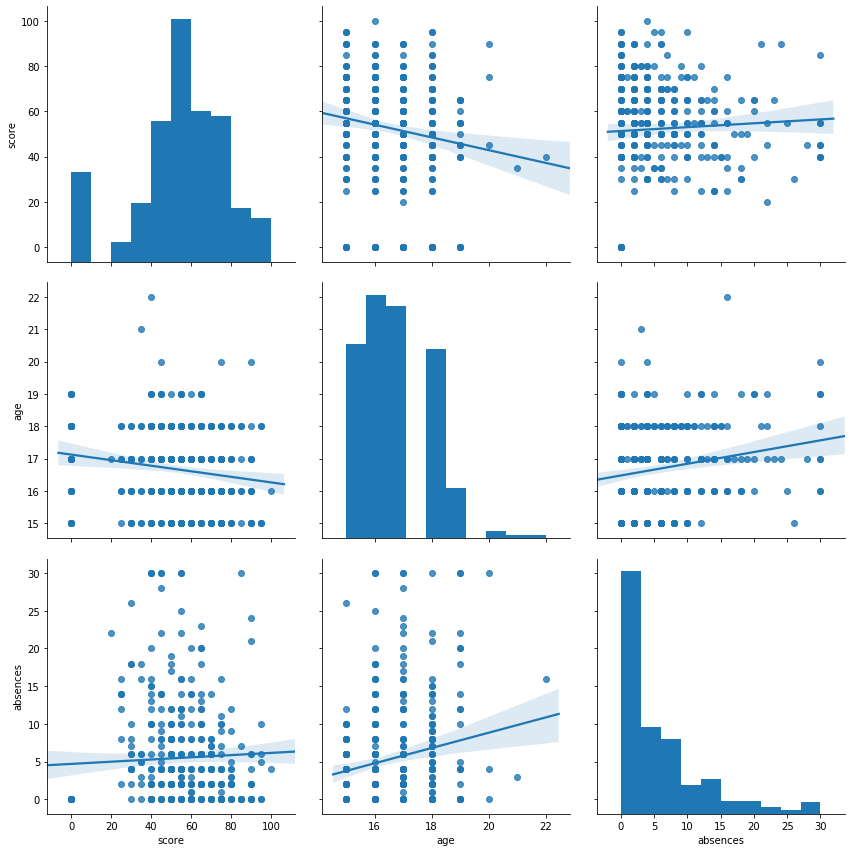

In [93]:
sns.pairplot(df[['score','age', 'absences']] ,kind = 'reg', height=4)
plt.show()

Занчительных корреляций невыявлено, ни между парамаетрами, ни между параметрами и целевой переменной. Тем не менее стоит оставить эти параметры ('age', 'absences'). Удалить всегда успеем. 

In [95]:
after_eda_columns += ['age', 'absences']

In [96]:
# сохраним новый датасет в новый файл

df[after_eda_columns].to_csv('stud_math_after_EDA.csv')
df[after_eda_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 10 columns):
address     389 non-null object
m_edu       389 non-null float64
f_edu       389 non-null float64
m_job       389 non-null object
f_job       389 non-null object
failures    389 non-null float64
higher      389 non-null int64
romantic    389 non-null int64
age         389 non-null int64
absences    389 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 43.4+ KB


# Выводы

In [97]:
after_eda_columns

['address',
 'm_edu',
 'f_edu',
 'm_job',
 'f_job',
 'failures',
 'higher',
 'romantic',
 'age',
 'absences']

Мы заполнили все пропуски в данных. К дальнейшему построению модели рекомендуеться следующий набор параметров (10 шт.): 
- address - адресс
- m_edu - образование матери
- f_edu - образование отца
- m_job - работа матери, также добавим и f_job - работа отца
- failures - внеучебные неудачи
- higher - желание поступать в ВУЗ
- romantic - наличие романтических отношений
- age - возраст
- absences - прогулы
Мы значительно сократили датасет (с 30 параметров до 10, с 395 строк до 389).
Учитывая, что все пропуски в данных были заполнены, при построении модели стоит попопробовать добавлять отбракованные параметры и убирать те что изначально рекомендованы.